# 00 settings

In [15]:
import scipy.io as scio
import h5py
import numpy as np
import tifffile as tf
from PIL import Image
import hdf5storage

import pandas as pd
import numpy as np
import math
import random
import copy
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import seaborn as sns
import networkx as nx
from networkx.algorithms import community
import powerlaw

from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.signal import find_peaks, correlate2d
from scipy import stats
from scipy import signal

# settings
duration = 10

bs_start_idx = [2306,2338,2369,2418,2452,2485,2546,2596,2687,2696,2765,2915,3014,3071,3130,3283,3402,3581,3662]
bs_end_idx = [2330,2357,2384,2436,2474,2500,2596,2650,2696,2729,2792,2936,3021,3081,3140,3291,3410,3590,3670]
ane_start_idx = [2288,2330,2357,2384,2436,2474,2500,2650,2729,2792,2936,3021,3081,3140,3242,3291,3410,3590,3670]
ane_end_idx = [2306,2339,2369,2418,2452,2485,2546,2687,2765,2915,3014,3071,3130,3236,3283,3402,3581,3662,3788]

bs_time_range = [2310, 2340, 2370, 2420, 2453, 2486, 2554, 2596, 2688, 2713, 2766, 2916, 3012, 3072, 3130, 3282, 3402, 3581, 3661]
ane_time_range = [2296, 2330, 2358, 2396, 2439, 2475, 2526, 2656, 2746, 2846, 2976, 3036, 3096, 3196, 3256, 3316, 3446, 3616, 3716]

res_path = 'xxx/data_analysis_res_m010/'
load_path = 'xxx/data_m010/'

print("res_path:", res_path)
print("load_path:", load_path)

res_path: xxx/data_analysis_res_m010/
load_path: xxx/data_m010/


# 01 active neurons in burst periods

period_duration: 19


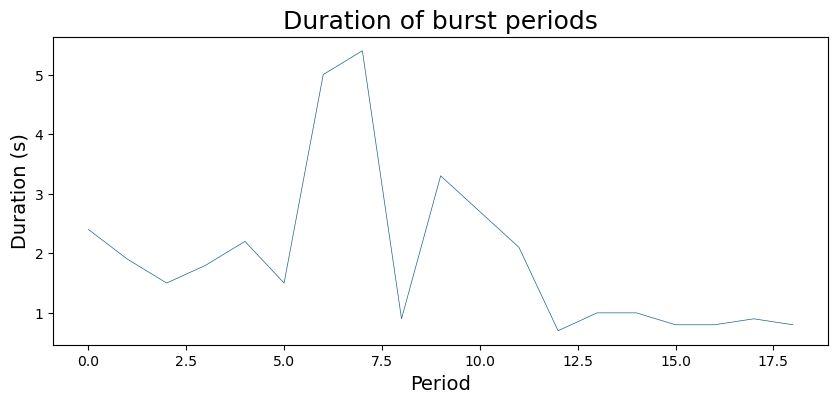

active_number: 19


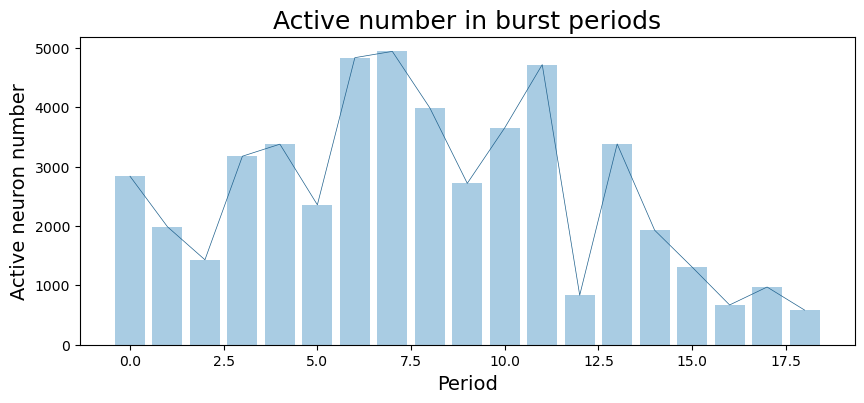

In [12]:
# duration
period_duration = [bs_end_idx[i] - bs_start_idx[i] for i in range(len(bs_start_idx))]
period_duration = [i / 10 for i in period_duration]
print("period_duration:", len(period_duration))

fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.plot(period_duration, "-", color = "#1F618D", linewidth = 0.5)
plt.title("Duration of burst periods", fontsize = 18)
plt.xlabel("Period", fontsize = 14)
plt.ylabel("Duration (s)", fontsize = 14)
plt.savefig(res_path + "neurons/all_bs_neurons_active_code_selfAvg_only_bs.pdf", bbox_inches='tight')
plt.show()

# active number
active_number = []
for start in bs_time_range: 
    select_data_ids = np.load(res_path + "neurons/neurons_ids_bs_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    active_number.append(len(select_data_ids))
print("active_number:", len(active_number))
    
x = range(len(active_number))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, active_number, color = "#A9CCE3")
plt.plot(active_number, "-", color = "#1F618D", linewidth = 0.5)
plt.title("Active number in burst periods", fontsize = 18)
plt.xlabel("Period", fontsize = 14)
plt.ylabel("Active neuron number", fontsize = 14)
plt.savefig(res_path + "neurons/all_bs_neurons_active_code_selfAvg_only_bs.pdf", bbox_inches='tight')
plt.show()

# 02 active neurons in supp periods

period_duration: 19


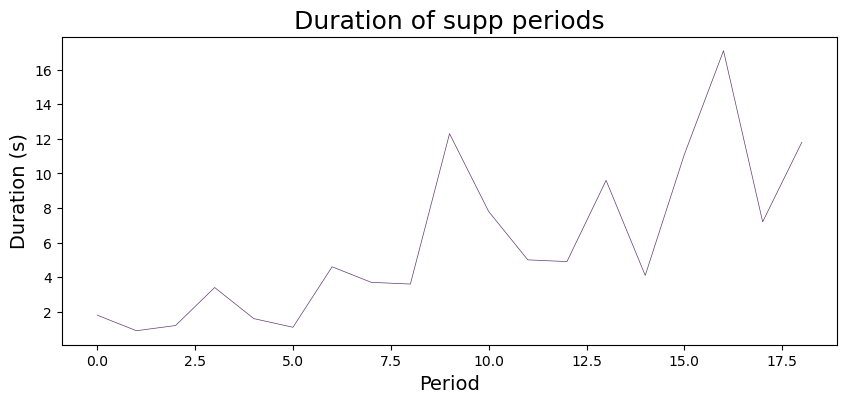

active_number: 19


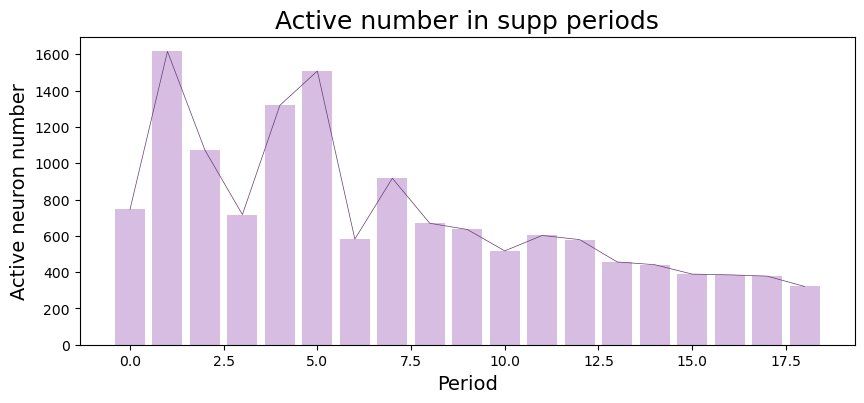

In [14]:
# duration
period_duration = [ane_end_idx[i] - ane_start_idx[i] for i in range(len(ane_start_idx))]
period_duration = [i / 10 for i in period_duration]
print("period_duration:", len(period_duration))

fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.plot(period_duration, "-", color = "#633974", linewidth = 0.5)
plt.title("Duration of supp periods", fontsize = 18)
plt.xlabel("Period", fontsize = 14)
plt.ylabel("Duration (s)", fontsize = 14)
# plt.savefig(res_path + "neurons/all_bs_neurons_active_code_selfAvg_only_bs.pdf", bbox_inches='tight')
plt.show()

# active number
active_number = []
for start in ane_time_range: 
    select_data_ids = np.load(res_path + "neurons/neurons_ids_ane_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    active_number.append(len(select_data_ids))
print("active_number:", len(active_number))
    
x = range(len(active_number))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, active_number, color = "#D7BDE2")
plt.plot(active_number, "-", color = "#633974", linewidth = 0.5)
plt.title("Active number in supp periods", fontsize = 18)
plt.xlabel("Period", fontsize = 14)
plt.ylabel("Active neuron number", fontsize = 14)
# plt.savefig(res_path + "neurons/all_bs_neurons_active_code_selfAvg_only_bs.pdf", bbox_inches='tight')
plt.show()